In [10]:
import tensorflow as tf
import IPython.display as display

  # Create a dictionary describing the features.
image_feature_description = {
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/height': tf.io.FixedLenFeature((), tf.int64),
    'image/width': tf.io.FixedLenFeature((), tf.int64),
    'image/filename': tf.io.FixedLenFeature([], tf.string),
    'image/format': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

filenames = ['/home/uv/tag_conda/workspace/training_demo/annotations/test.record']
# filenames = ['/home/uv/tag_conda/workspace/training_demo/annotations/train.record']
raw_dataset = tf.data.TFRecordDataset(filenames)


In [11]:
# Count the records
records_n = sum(1 for record in raw_dataset)
print("raw records_n = {}".format(records_n))

for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  # print(example)


parsed_image_dataset = raw_dataset.map(_parse_image_function)

# Count the records
records_n = sum(1 for record in parsed_image_dataset)
print("parsed records_n = {}".format(records_n))

raw records_n = 65
parsed records_n = 65


In [12]:
filenames = []
for image_features in parsed_image_dataset:
  filename = image_features['image/filename'].numpy().decode('utf-8')
  filenames.append(filename)
  print(filename)

1008141E-Stephen.Olivera@sce.com-23D55386-D142-466B-A0CD-B429431B35E4.jpg
1623584E-BrianW.Spence@sce.com-84757100-2414-46D0-B748-C87CBBCDDC76.jpg
1009059E-Arturo.Plascencia@sce.com-450F9C1E-20CD-49B3-8905-5EB01C4AB7B2.jpg
1011606E-Airion.Piggue@sce.com-A891CFDA-4F61-462C-9055-98CA6DE46209.jpg
1008120E-John.Anderson@sce.com-44B73339-E421-47DB-9AAE-A665BD714F89.jpg
318537S-Ramon.Bargas@sce.com-D57090FE-DD51-41AF-BD3D-AFE4E1A064F5.jpg
1034546E-Jesse.Gallegos@sce.com-9DEBAAB1-DD3E-48C4-9D2B-8FD7FEF8CC9A.jpg
2059639E-David.Mitchell@sce.com-300BB795-6937-40D4-ADE5-DE13A3ED8A91.jpg
1007364E-Samuel.Cardoza@sce.com-61183F5E-88F9-4953-8318-35F9CE30946C.jpg
3633S-scott.a.denney@sce.com-4DBF6EE1-DC6E-452A-AA3C-1C8647727BE2.jpg
24799S-Maurice.Recinos@sce.com-7C47C6C8-1EBE-4B15-94D6-CBBA8B7D382D.jpg
1427935E-Julian.Rubio@sce.com-0FCE04DD-25DD-420A-910D-CF39C0BD5A39.jpg
1003599E-Alvaro.Gomez@sce.com-D38BAC9A-C4EB-4BC6-8D98-FFD5C345108F.jpg
1008916E-Arturo.Plascencia@sce.com-65461FCF-1F3A-40AF-92C1-4F

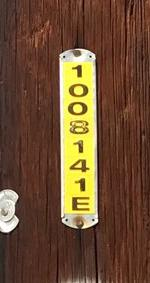

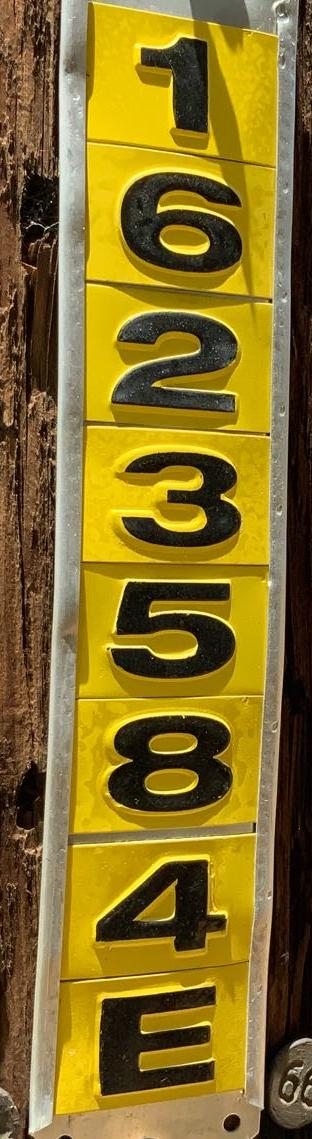

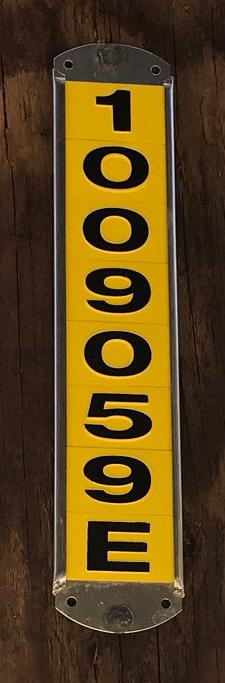

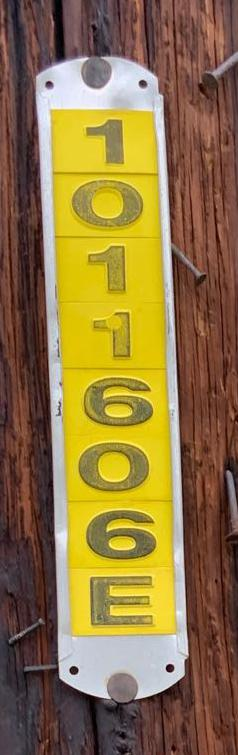

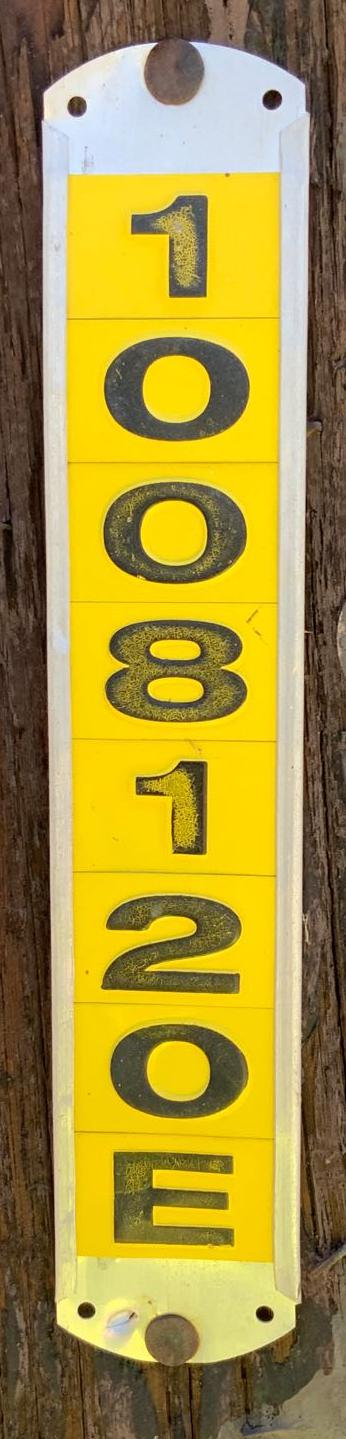

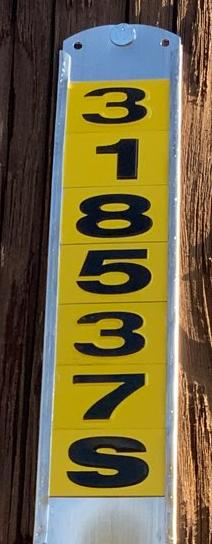

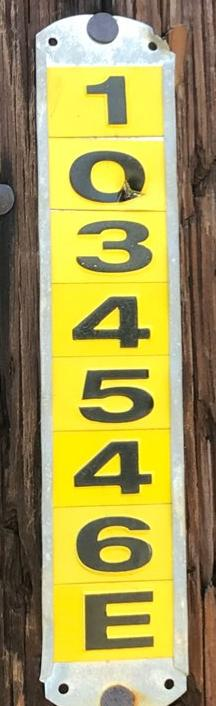

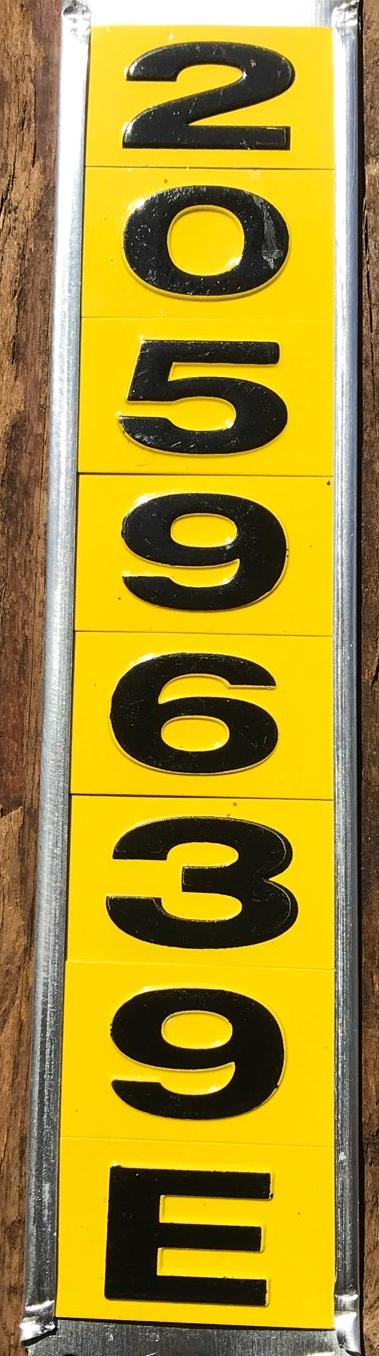

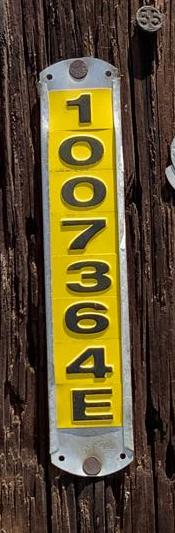

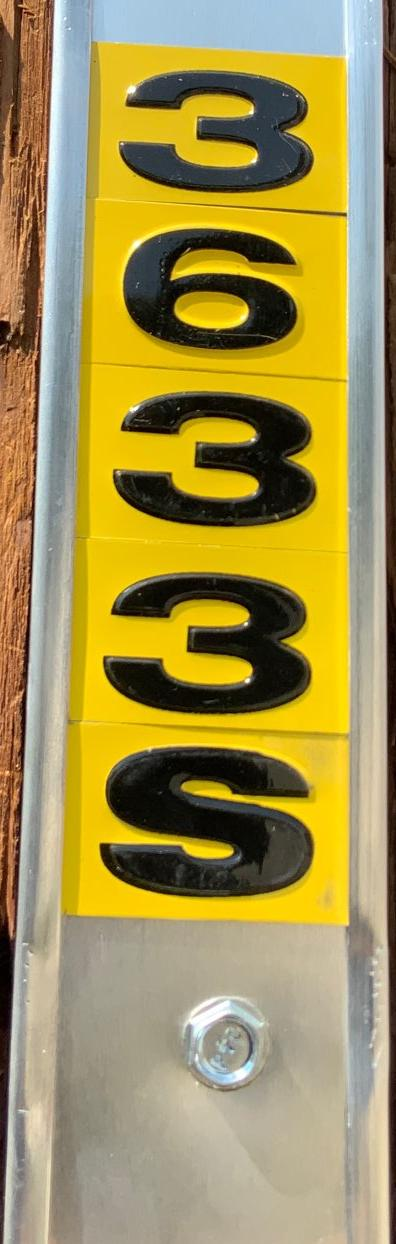

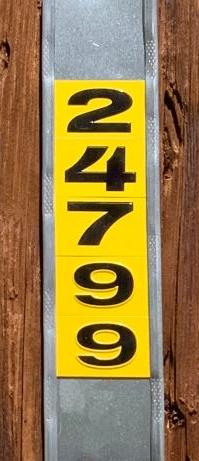

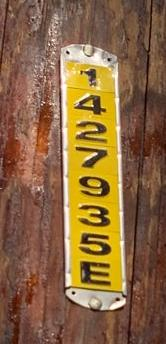

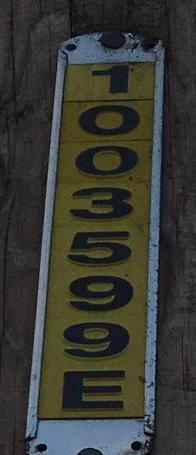

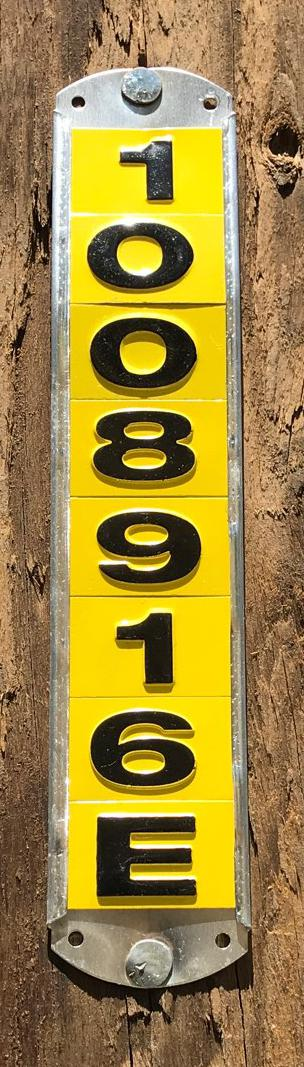

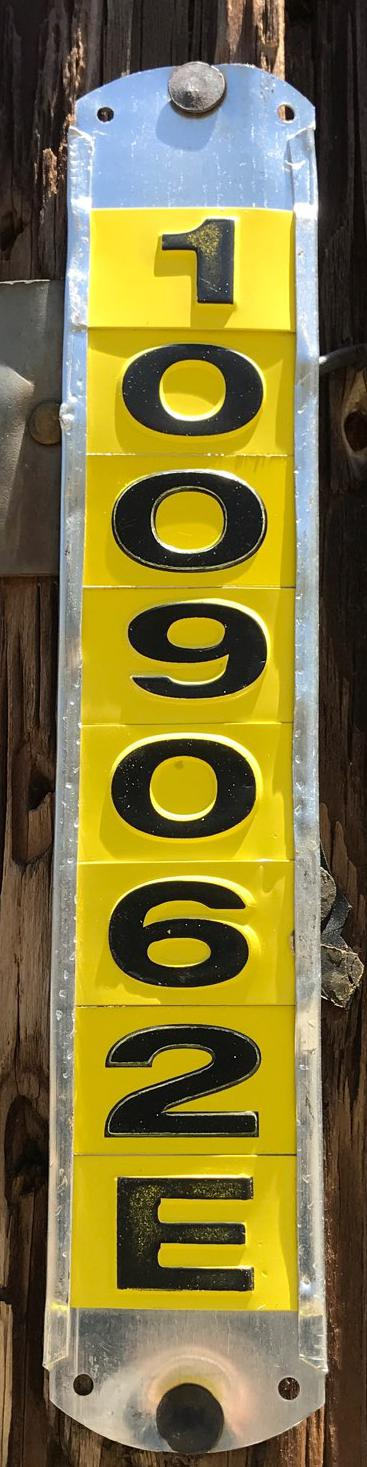

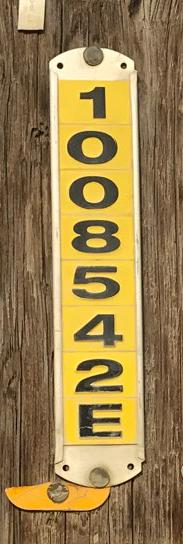

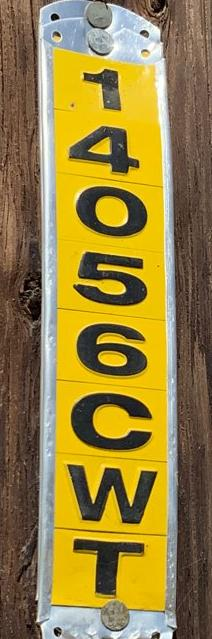

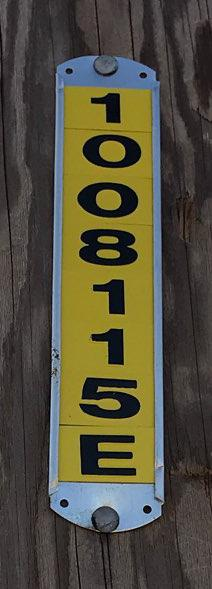

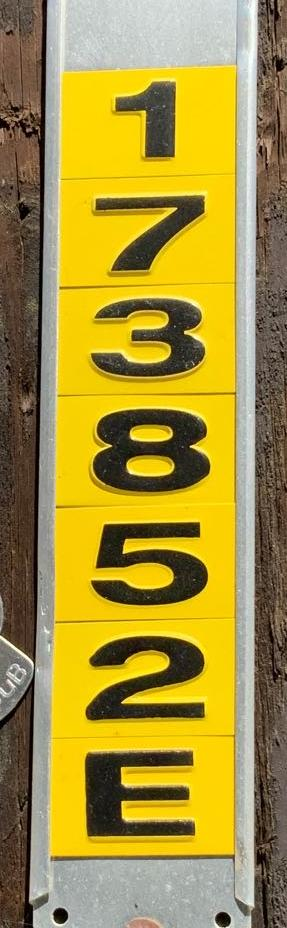

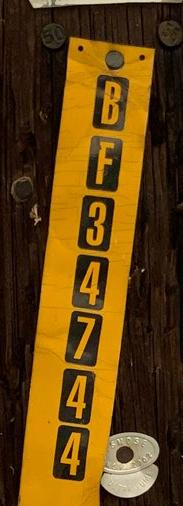

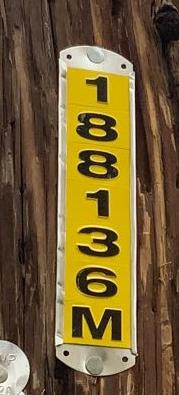

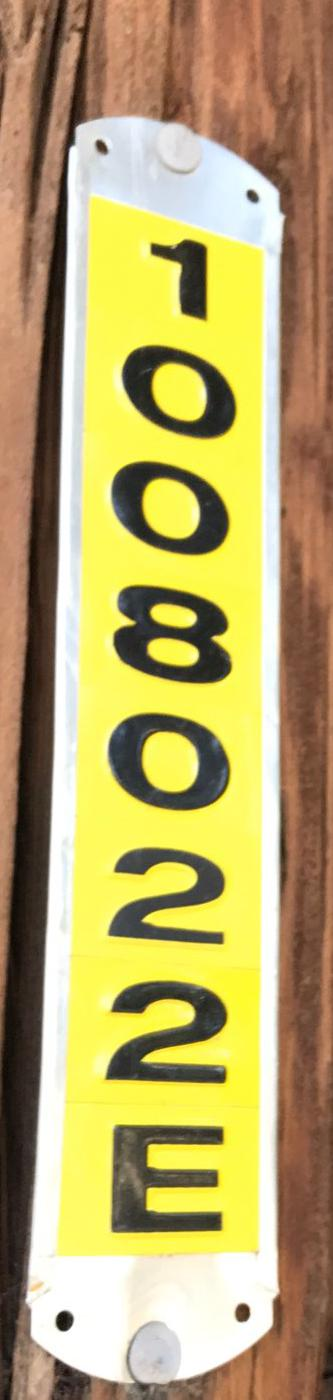

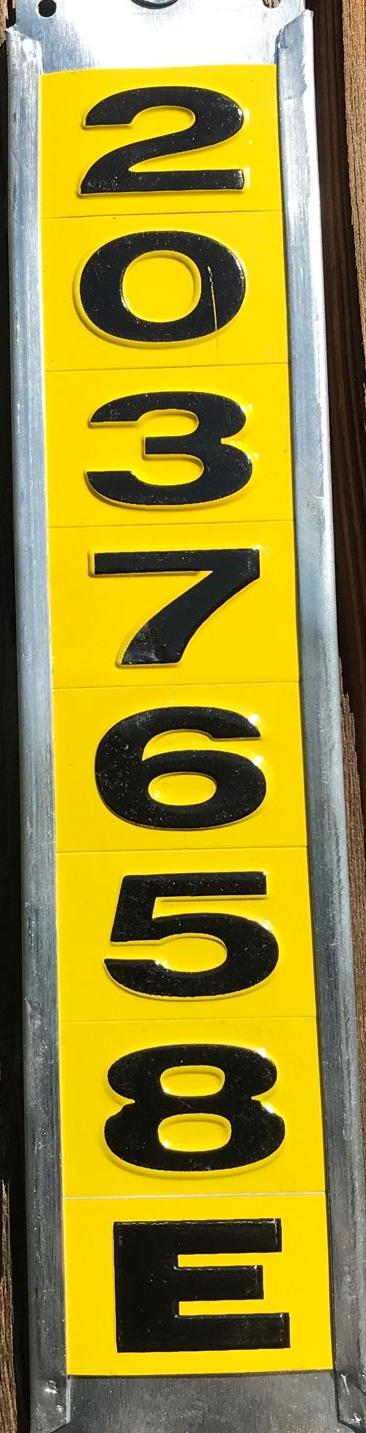

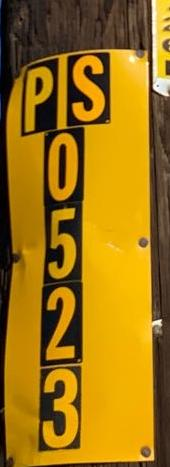

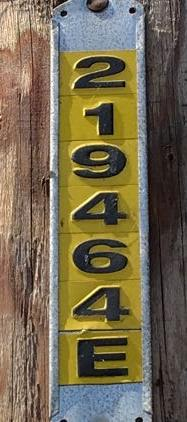

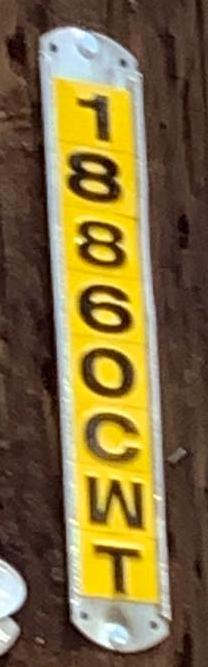

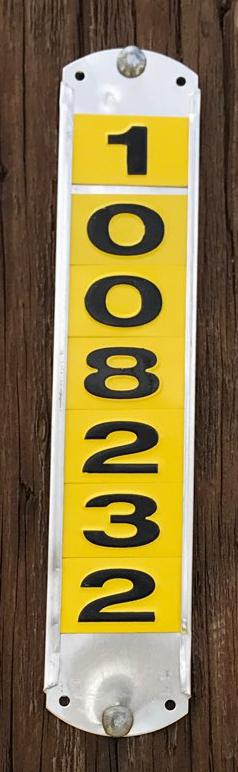

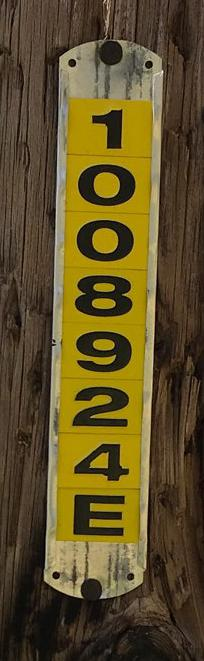

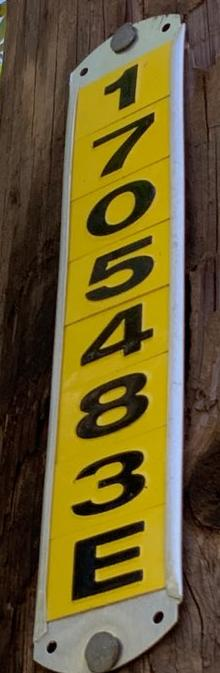

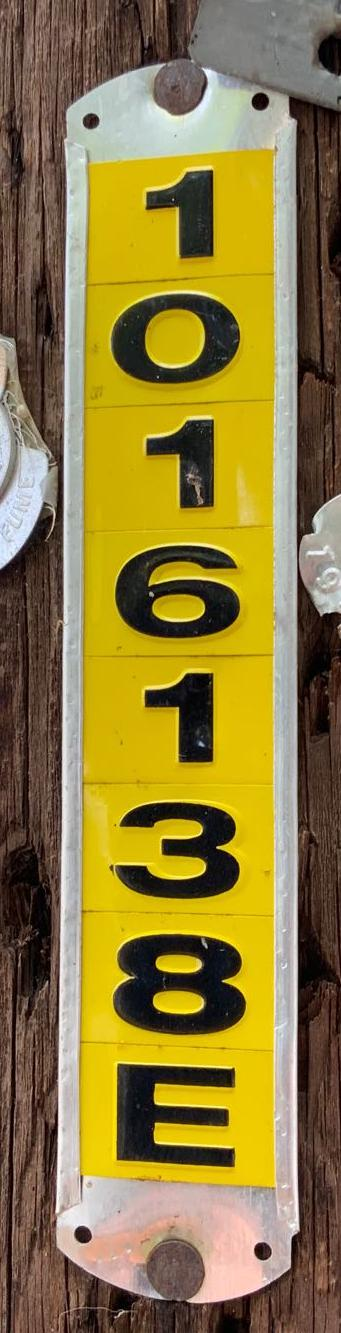

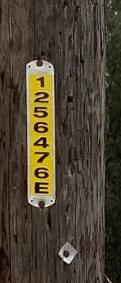

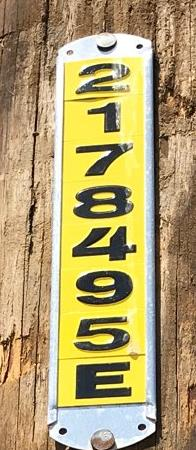

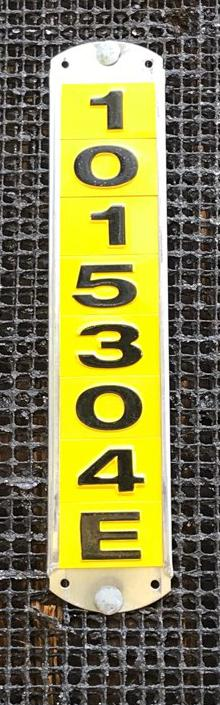

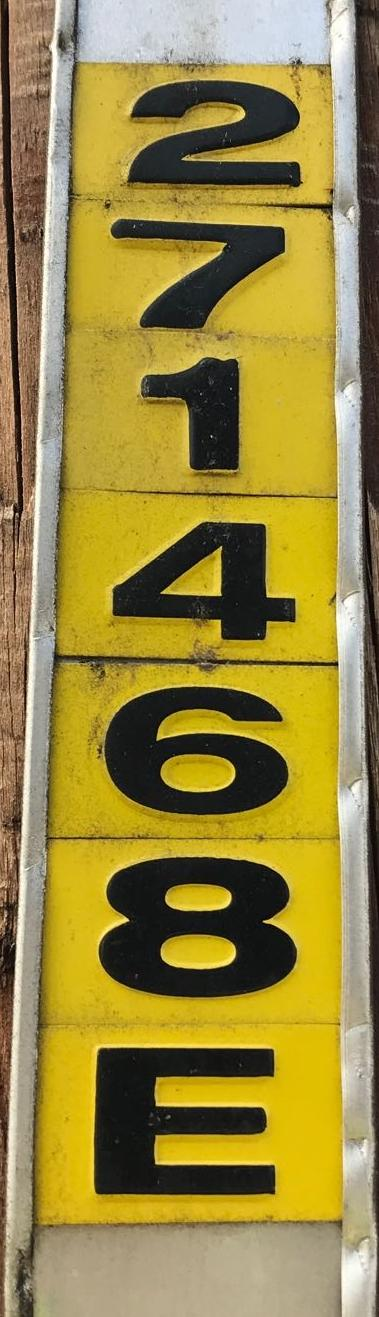

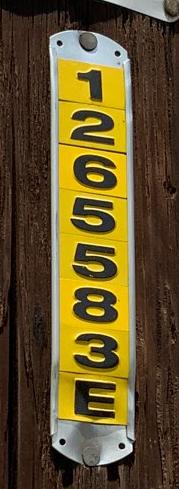

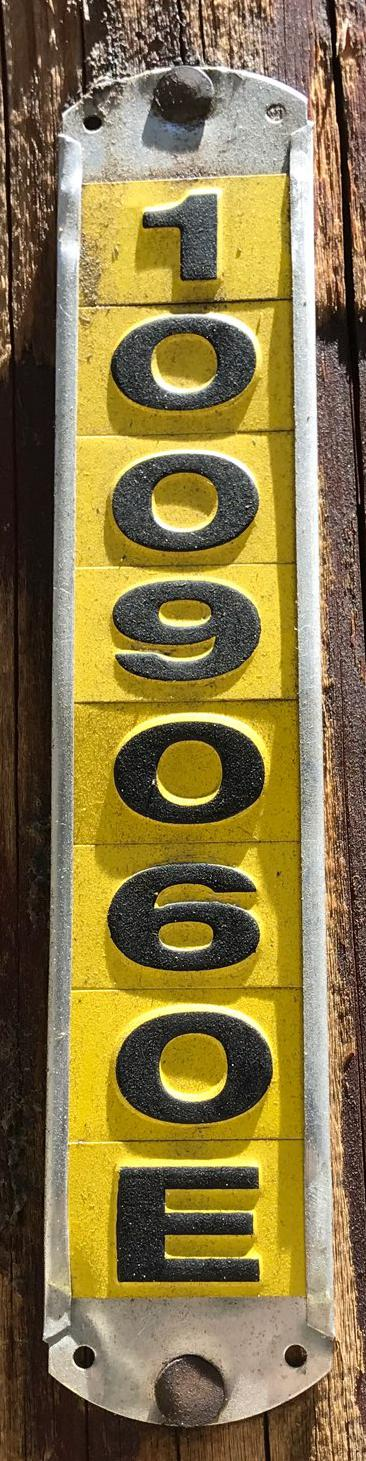

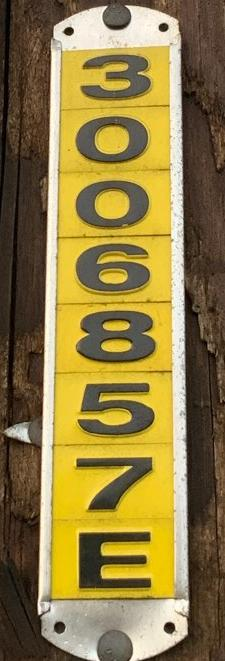

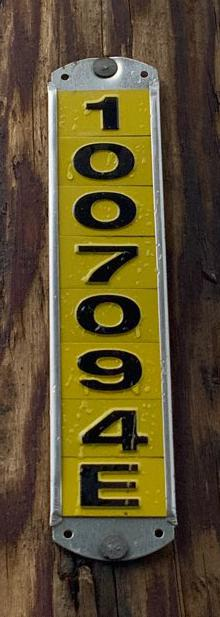

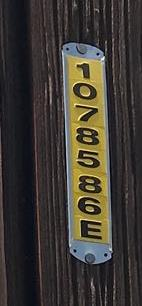

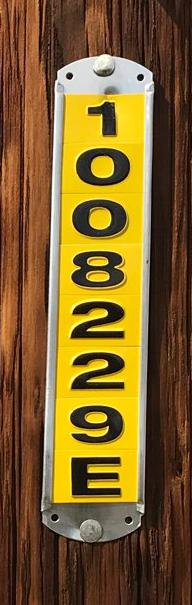

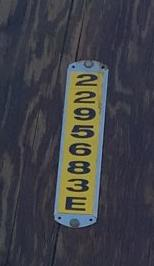

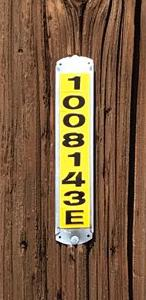

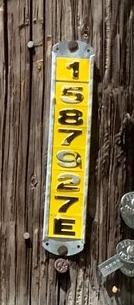

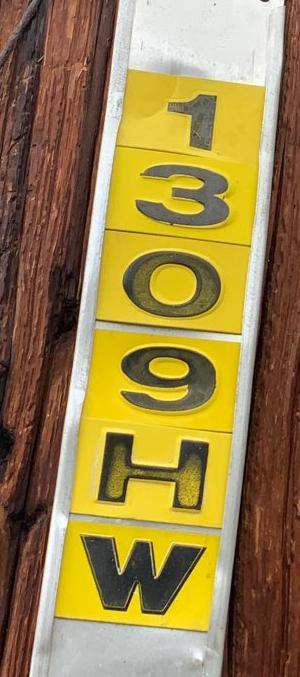

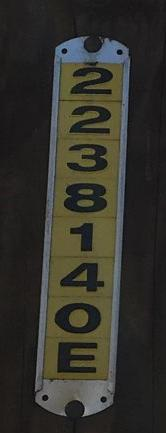

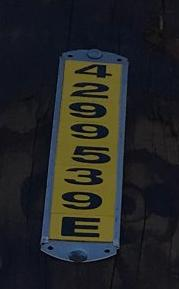

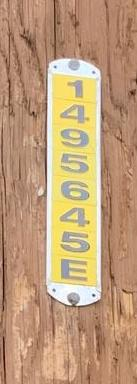

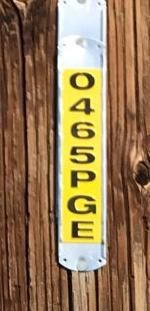

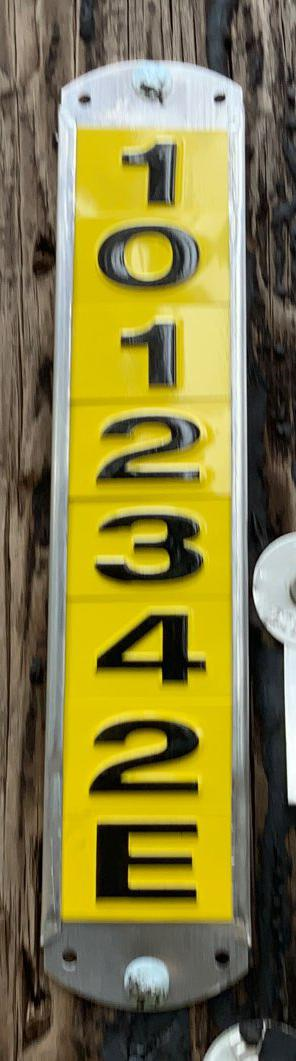

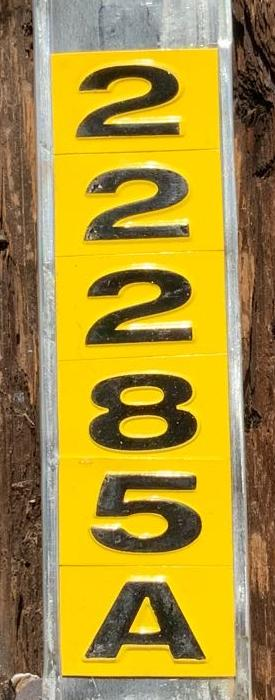

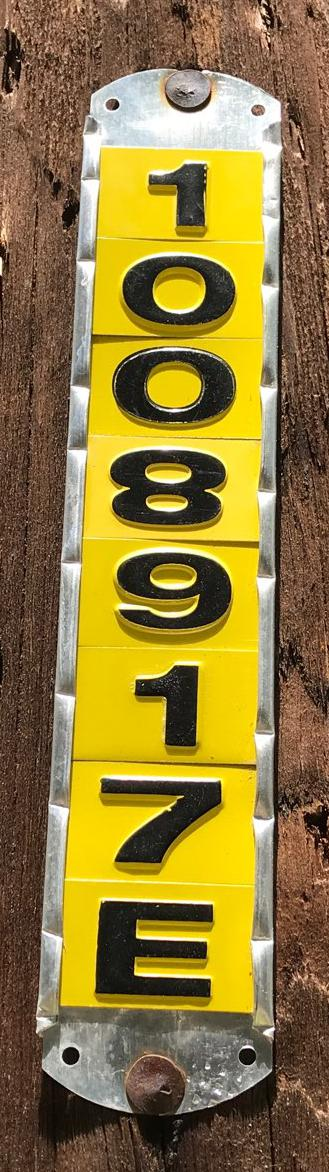

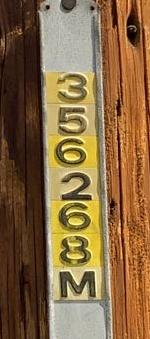

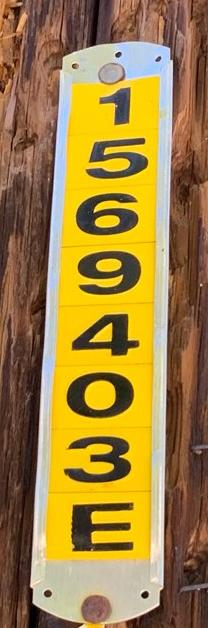

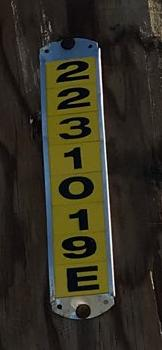

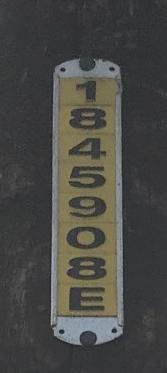

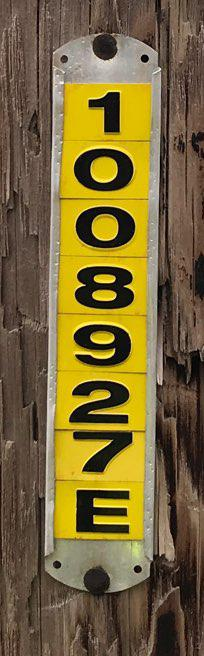

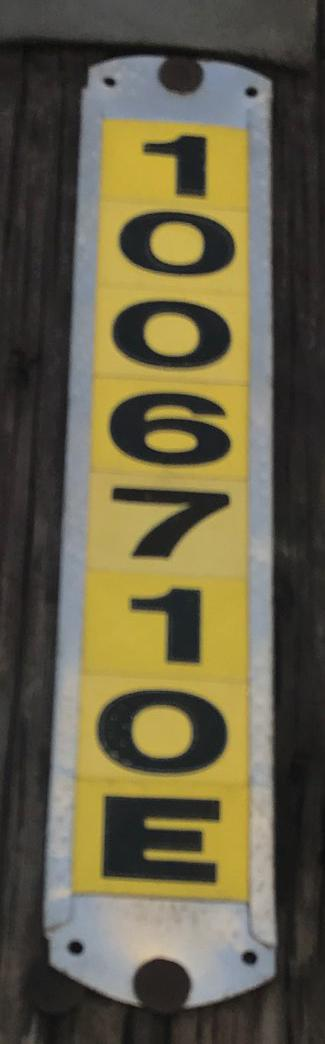

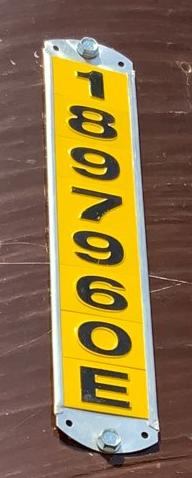

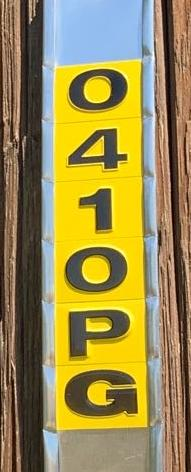

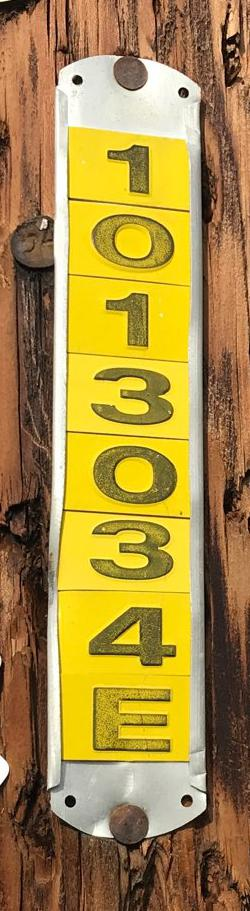

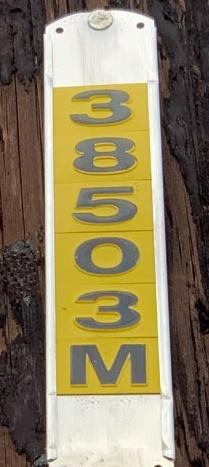

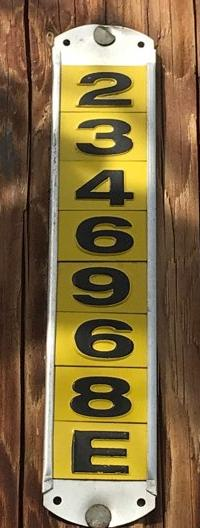

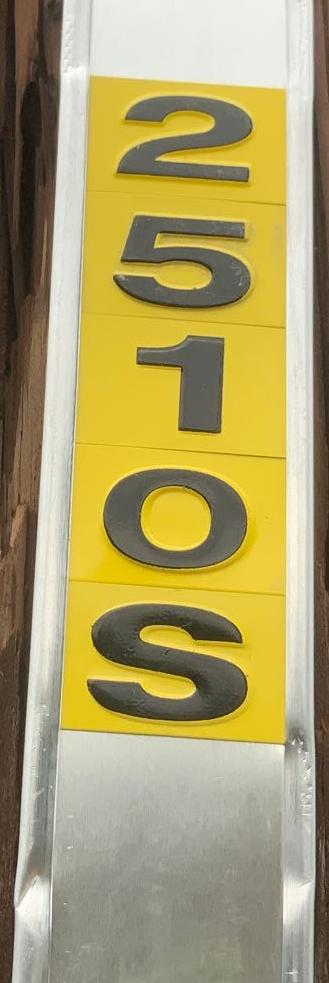

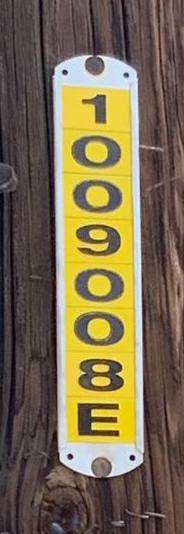

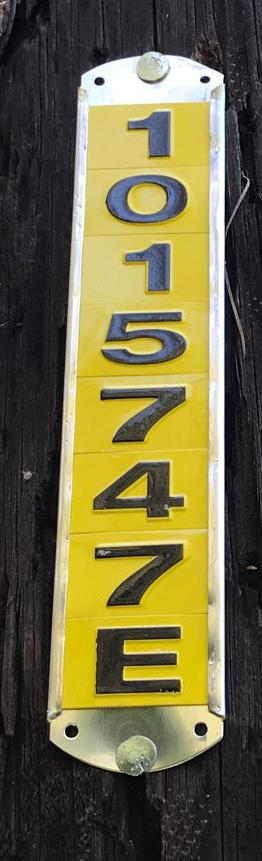

In [13]:
for image_features in parsed_image_dataset:
  tensor = image_features['image/encoded']
  image_raw = tensor.numpy()
  display.display(display.Image(data=image_raw))
